# Датасет Кати (с использованием классов)

In [196]:
from __future__ import division, print_function, unicode_literals

import sys
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import IPython as IPy
import sklearn as skl
from sklearn.model_selection import train_test_split

import os
import tarfile
import urllib
import pickle

import joblib

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [197]:
from clintraj_qi import *
from clintraj_optiscale import *
from clintraj_eltree import *
from clintraj_util import *
import scipy.stats

In [198]:
def save_obj(obj, name):
    os.makedirs("obj/Chinese/No Classes/Unhealthy", exist_ok=True)
    with open('obj/Chinese/No Classes/Unhealthy/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('obj/Chinese/No Classes/Unhealthy/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [199]:
dataset = pd.read_csv('../datasets/chinese.csv', sep=',')
dataset

,id,Qrst_dur,P_Q_duration,Q_T_duration,T_duration,P_duration,Heart_rate,f_label,sex,age
0,0,0.076632,NaN,0.279263,0.123100,NaN,171.184023,5,0,74
1,1,0.107158,NaN,0.298000,0.112200,NaN,187.826087,1,0,74
2,2,0.082800,NaN,0.284947,0.108200,NaN,186.244078,2,0,74
3,3,0.081500,NaN,0.314706,0.142556,NaN,185.546875,2,0,74
4,4,0.075053,NaN,0.268421,0.084762,NaN,170.239596,7,0,74
...,...,...,...,...,...,...,...,...,...,...
23995,23995,0.104125,0.0,0.376000,0.153500,0.071875,75.942958,0,1,61
23996,23996,0.100500,0.0,0.413750,0.193625,0.080750,75.598488,0,1,61
23997,23997,0.094750,0.0,0.420625,0.190500,0.087500,75.062552,0,1,61
23998,23998,0.091500,0.0,0.416125,0.178625,0.093750,74.775673,0,1,61


In [200]:
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset

,id,Qrst_dur,P_Q_duration,Q_T_duration,T_duration,P_duration,Heart_rate,f_label,sex,age
0,7943,0.122857,0.024000,0.471667,0.191667,0.054000,71.047957,0,0,80
1,20951,0.084667,0.196667,0.354667,0.172500,0.054000,104.150229,0,0,88
2,4261,0.095846,0.122000,0.416462,0.171692,0.080000,77.703432,1,0,78
3,22289,0.100437,0.170125,0.380312,0.166000,0.093500,75.526861,0,0,51
4,4769,0.090714,0.124438,0.345810,0.118326,0.088065,93.019738,8,0,51
...,...,...,...,...,...,...,...,...,...,...
23995,3097,0.092800,0.152000,0.369760,0.159280,0.055000,96.025607,2,0,58
23996,10180,0.113778,0.140889,0.411778,0.174200,0.064000,76.178384,0,0,64
23997,4215,0.079077,0.179846,0.393000,0.140923,0.106923,82.135524,6,0,64
23998,6709,0.116000,0.153091,0.412400,0.208800,0.094909,79.020150,2,0,95


In [201]:
dataset = dataset.drop(dataset[(dataset['f_label'] == 0)].index).reset_index(drop=True)
dataset

,id,Qrst_dur,P_Q_duration,Q_T_duration,T_duration,P_duration,Heart_rate,f_label,sex,age
0,4261,0.095846,0.122000,0.416462,0.171692,0.080000,77.703432,1,0,78
1,4769,0.090714,0.124438,0.345810,0.118326,0.088065,93.019738,8,0,51
2,2647,0.102806,0.121833,0.358746,0.182060,0.079917,105.073233,8,1,35
3,6432,0.121600,0.148600,0.371200,0.181800,0.086000,85.254184,7,0,61
4,686,0.093556,0.142000,0.410667,0.143111,0.060000,71.417944,8,0,78
...,...,...,...,...,...,...,...,...,...,...
6872,540,0.128256,0.145474,0.374579,0.180263,0.072579,102.758248,4,0,58
6873,3968,0.104947,0.121053,0.346889,0.186000,0.066000,111.305782,2,0,60
6874,3097,0.092800,0.152000,0.369760,0.159280,0.055000,96.025607,2,0,58
6875,4215,0.079077,0.179846,0.393000,0.140923,0.106923,82.135524,6,0,64


In [202]:
for col in dataset:
    print(f'{col}: {dataset[col].isna().sum()} NaN vals')

id: 0 NaN vals
Qrst_dur: 4 NaN vals
P_Q_duration: 829 NaN vals
Q_T_duration: 4 NaN vals
T_duration: 3 NaN vals
P_duration: 821 NaN vals
Heart_rate: 5 NaN vals
f_label: 0 NaN vals
sex: 0 NaN vals
age: 0 NaN vals


In [203]:
quantify_nans(dataset)

Missing values 1666 (2.6917422002488163%)
Number of complete rows: 5813 (84.52813726915807%)


In [204]:
dataset_orig = dataset.copy()
dataset = dataset.drop('f_label', axis = 1)

In [205]:
X_data_raw = dataset.drop('id', axis = 1)
X_data_raw

,Qrst_dur,P_Q_duration,Q_T_duration,T_duration,P_duration,Heart_rate,sex,age
0,0.095846,0.122000,0.416462,0.171692,0.080000,77.703432,0,78
1,0.090714,0.124438,0.345810,0.118326,0.088065,93.019738,0,51
2,0.102806,0.121833,0.358746,0.182060,0.079917,105.073233,1,35
3,0.121600,0.148600,0.371200,0.181800,0.086000,85.254184,0,61
4,0.093556,0.142000,0.410667,0.143111,0.060000,71.417944,0,78
...,...,...,...,...,...,...,...,...
6872,0.128256,0.145474,0.374579,0.180263,0.072579,102.758248,0,58
6873,0.104947,0.121053,0.346889,0.186000,0.066000,111.305782,0,60
6874,0.092800,0.152000,0.369760,0.159280,0.055000,96.025607,0,58
6875,0.079077,0.179846,0.393000,0.140923,0.106923,82.135524,0,64


## План

Построим кучу деревьев на основе:
1. Масштабирования: нормализации, стандартизации, оптимизации (если это так можно назвать),
2. 2D/3D.

## 1. Обработка датасета

### Нормализация и стандартизация

In [206]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', MinMaxScaler()),
                        ])

num_pipeline_std = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', StandardScaler()),
                        ])

X_data_prep = num_pipeline.fit_transform(X_data_raw) 
X_data_prep_std = num_pipeline_std.fit_transform(X_data_raw) 
X_prep = pd.DataFrame(X_data_prep)
X_prep_std = pd.DataFrame(X_data_prep_std)

### Оптимизация

In [207]:
'''
variable_types, binary, continuous, ordinal = detect_variable_type(dataset, 10, verbose=False)
dfq,replacement_info = quantify_dataframe_univariate(dataset, variable_types)
with open('temp.txt','w') as fid:
    fid.write(replacement_info)
'''

"\nvariable_types, binary, continuous, ordinal = detect_variable_type(dataset, 10, verbose=False)\ndfq,replacement_info = quantify_dataframe_univariate(dataset, variable_types)\nwith open('temp.txt','w') as fid:\n    fid.write(replacement_info)\n"

In [208]:
'''
dfq_imputed = SVDcomplete_imputation_method(dfq, variable_types, verbose=True,num_components=-1)
dequant_info = invert_quant_info(load_quantification_info('temp.txt'))
df_imputed = dequantify_table(dfq_imputed,dequant_info)
display(df_imputed)
'''

"\ndfq_imputed = SVDcomplete_imputation_method(dfq, variable_types, verbose=True,num_components=-1)\ndequant_info = invert_quant_info(load_quantification_info('temp.txt'))\ndf_imputed = dequantify_table(dfq_imputed,dequant_info)\ndisplay(df_imputed)\n"

In [209]:
'''
df = remove_constant_columns_from_dataframe(df_imputed)
variable_names = [str(s) for s in df.columns[1:]]
X = df[df.columns[1:]].to_numpy()
X_orig_opt = X
X_before_scaling = X.copy()
X_opt, cik = optimal_scaling(X,variable_types,verbose=True,vmax=0.6)
'''

'\ndf = remove_constant_columns_from_dataframe(df_imputed)\nvariable_names = [str(s) for s in df.columns[1:]]\nX = df[df.columns[1:]].to_numpy()\nX_orig_opt = X\nX_before_scaling = X.copy()\nX_opt, cik = optimal_scaling(X,variable_types,verbose=True,vmax=0.6)\n'

In [210]:
'''
save_obj(df, "dataframe_opt")
save_obj(X_opt, "X_opt")
save_obj(cik, "cik")
save_obj(X_orig_opt, "X_orig_opt")
save_obj(X_before_scaling, "X_before_scaling")
'''

'\nsave_obj(df, "dataframe_opt")\nsave_obj(X_opt, "X_opt")\nsave_obj(cik, "cik")\nsave_obj(X_orig_opt, "X_orig_opt")\nsave_obj(X_before_scaling, "X_before_scaling")\n'

In [211]:
X_opt = load_obj("X_opt")
cik = load_obj("cik")
X_orig_opt = pd.DataFrame(load_obj("X_orig_opt"))
X_orig_opt['f_label'] = dataset_orig['f_label']
X_orig_opt = X_orig_opt.to_numpy()
X_before_scaling = load_obj("X_before_scaling")
dataframe_opt = load_obj("dataframe_opt")
np.random.shuffle(X_orig_opt)

## 2. Построение деревьев

In [212]:
import elpigraph
from elpigraph import computeElasticPrincipalTree

nnodes = 50
X_norm = X_prep.to_numpy()
X_std = X_prep_std.to_numpy()

In [213]:
def do_PCA(X):
    # reduced_dimension = 12
    X_to_PCA = scipy.stats.zscore(X)
    pca = PCA(n_components=X_to_PCA.shape[1],svd_solver='full')
    Y = pca.fit_transform(X_to_PCA)
    v = pca.components_.T
    mean_val = np.mean(X_to_PCA,axis=0)
    return Y[:], v, mean_val # ,0:reduced_dimension]

X_pca_norm, components_norm, mnval_norm = do_PCA(X_norm)
X_pca_std, components_std, mnval_std = do_PCA(X_std)
X_pca_opt, components_opt, mnval_opt = do_PCA(X_opt)

In [214]:
def create_extended_tree(X, nnodes):
    tree_elpi = computeElasticPrincipalTree(X, nnodes, alpha=0.01, Mu=0.1, Lambda=0.05, FinalEnergy='Penalized')[0]
    prune_the_tree(tree_elpi)
    tree_extended = ExtendLeaves_modified(X, tree_elpi, Mode = "QuantDists", ControlPar = .5, DoSA = False)
    return tree_extended

'''
tree_norm = create_extended_tree(X_pca_norm, 50)
tree_std = create_extended_tree(X_pca_std, 50)
tree_opt = create_extended_tree(X_pca_opt, 50)
'''

'\ntree_norm = create_extended_tree(X_pca_norm, 50)\ntree_std = create_extended_tree(X_pca_std, 50)\ntree_opt = create_extended_tree(X_pca_opt, 50)\n'

In [215]:
'''
save_obj(tree_norm, "chinese_tree_norm")
save_obj(tree_std, "chinese_tree_std")
save_obj(tree_opt, "chinese_tree_opt")
'''

'\nsave_obj(tree_norm, "chinese_tree_norm")\nsave_obj(tree_std, "chinese_tree_std")\nsave_obj(tree_opt, "chinese_tree_opt")\n'

In [216]:
tree_norm = load_obj("chinese_tree_norm")
tree_std = load_obj("chinese_tree_std")
tree_opt = load_obj("chinese_tree_opt")

In [217]:
dataframe_opt

,id,Qrst_dur,P_Q_duration,Q_T_duration,T_duration,P_duration,Heart_rate,sex,age
0,2207,0.100400,0.118000,0.415750,0.172750,0.069600,68.947906,0,52.0
1,4524,0.082333,0.170167,0.421167,0.163000,0.088769,53.789731,0,54.0
2,3002,0.091385,0.152775,0.329385,0.136154,0.084277,105.448155,0,73.0
3,2969,0.094500,0.162333,0.385667,0.150462,0.116154,89.710480,1,83.0
4,2951,0.156154,0.152651,0.424769,0.167846,0.084089,90.851735,0,52.0
...,...,...,...,...,...,...,...,...,...
6872,4976,0.094727,0.168364,0.383000,0.213800,0.098182,82.327113,1,68.0
6873,5865,0.092533,0.117556,0.424400,0.219067,0.084000,75.174976,0,31.0
6874,1073,0.094471,0.143529,0.419125,0.209000,0.088824,78.004388,1,51.0
6875,6159,0.073333,0.152000,0.333818,0.109091,0.071000,103.871577,0,79.0


In [218]:
variable_names = [str(s) for s in dataframe_opt.columns[1:]]
X_orig_imputer = pd.DataFrame(SimpleImputer(strategy="median").fit_transform(X_data_raw), columns=variable_names)
X_orig_imputer['f_label'] = dataset_orig['f_label']
variable_names = [str(s) for s in X_orig_imputer.columns]
X_orig_imputer = X_orig_imputer.to_numpy()

## 3. Визуализация деревьев

### Окраска ветвей деревьев

In [219]:
def tree_visualization(tree_elpi, X, X_orig, components_vec, mean_val):
    vec_labels_by_branches = partition_data_by_tree_branches(X, tree_elpi)

    partition, dists = elpigraph.src.core.PartitionData(X = X, NodePositions = tree_elpi['NodePositions'], 
                                                        SquaredX = np.sum(X**2,axis=1,keepdims=1),
                                                        MaxBlockSize = 100000000, TrimmingRadius = np.inf
                                                        )
    partition_by_node = np.zeros(len(partition))
    for i,p in enumerate(partition):
        partition_by_node[i] = p[0]

    variable_names = [str(s) for s in dataset.columns[1:]]
    visualize_eltree_with_data(tree_elpi, X, X_orig, components_vec, mean_val, 'k', variable_names,
                              Color_by_partitioning = True, visualize_partition = vec_labels_by_branches)

In [220]:
figsize=(15, 12)

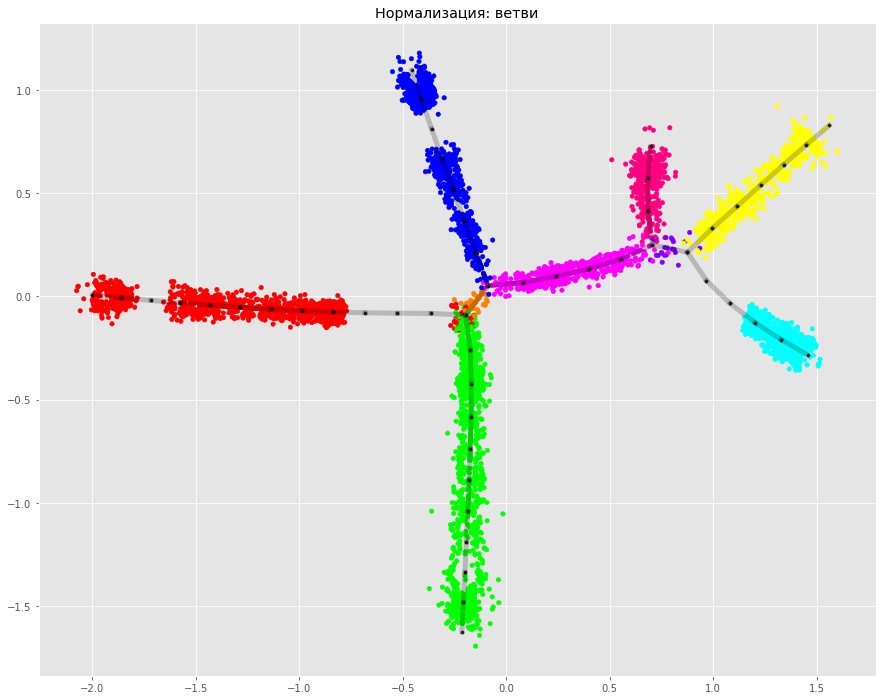

In [221]:
fig = plt.figure(figsize=figsize)
tree_visualization(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm)
plt.title("Нормализация: ветви")
plt.show()

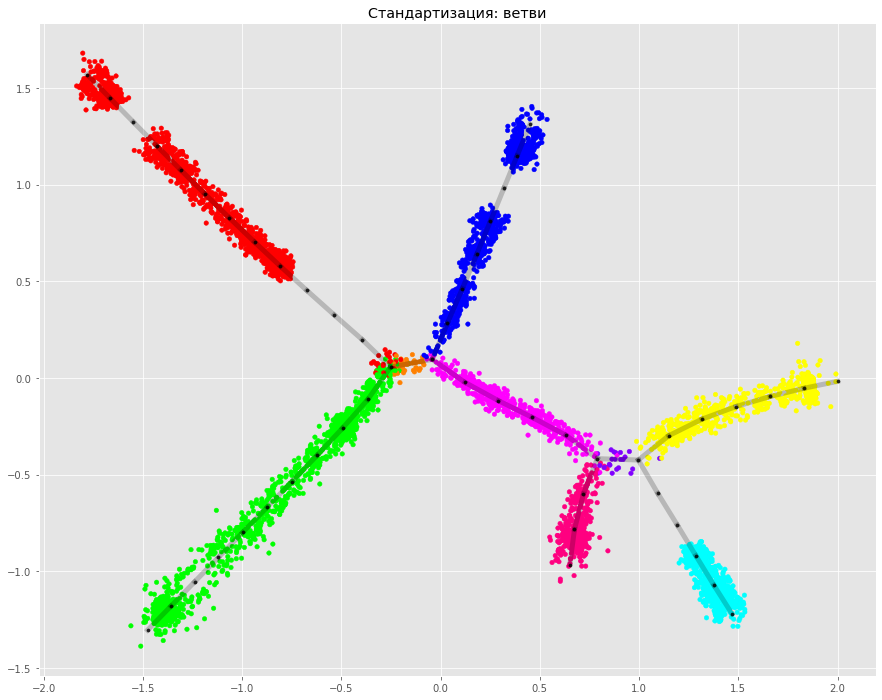

In [222]:
fig = plt.figure(figsize=figsize)
tree_visualization(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std)
plt.title("Стандартизация: ветви")
plt.show()

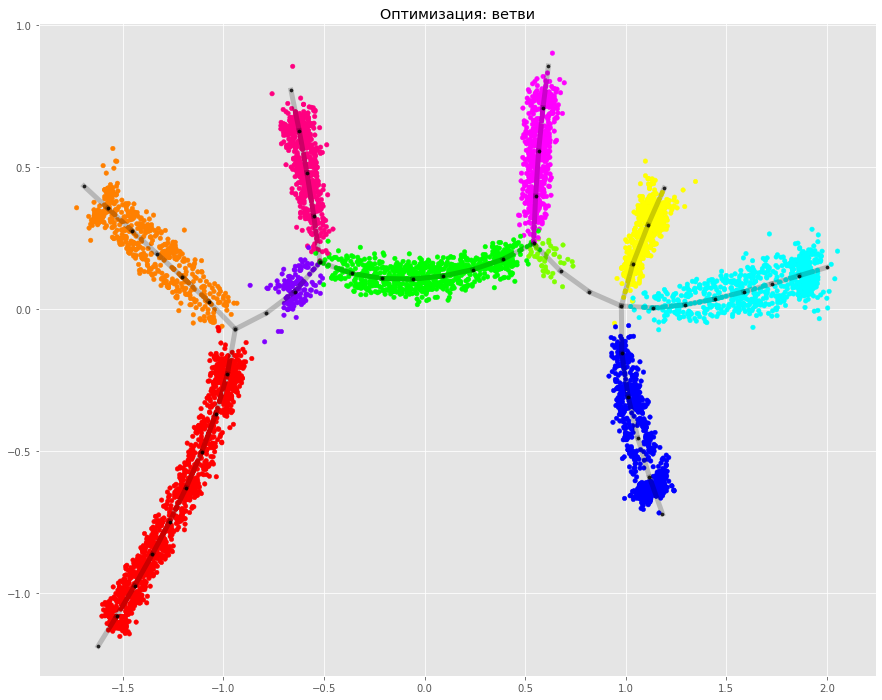

In [223]:
fig = plt.figure(figsize=figsize)
tree_visualization(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt)
plt.title("Оптимизация: ветви")
plt.show()

### Визуализация атрибутов и исследование деревьев

#### Нормализация

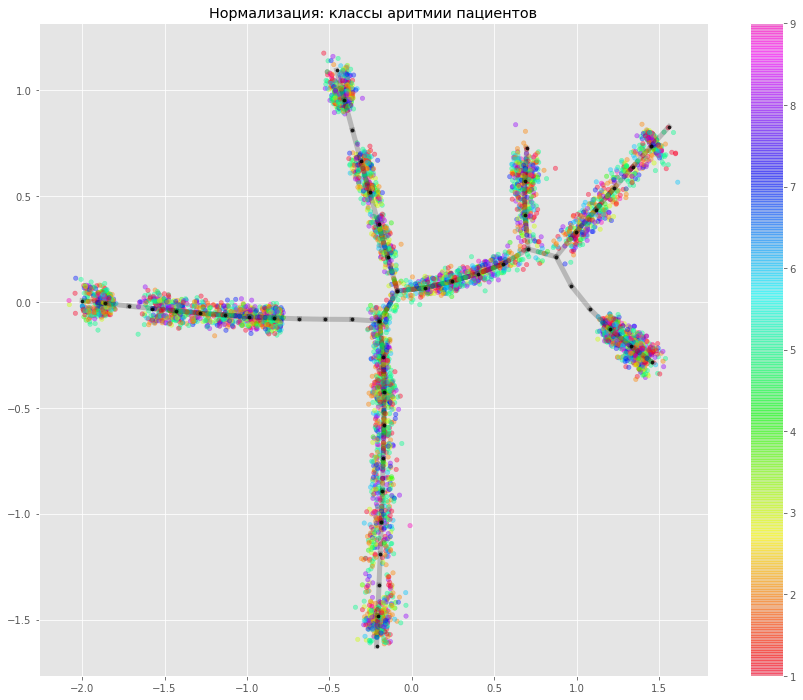

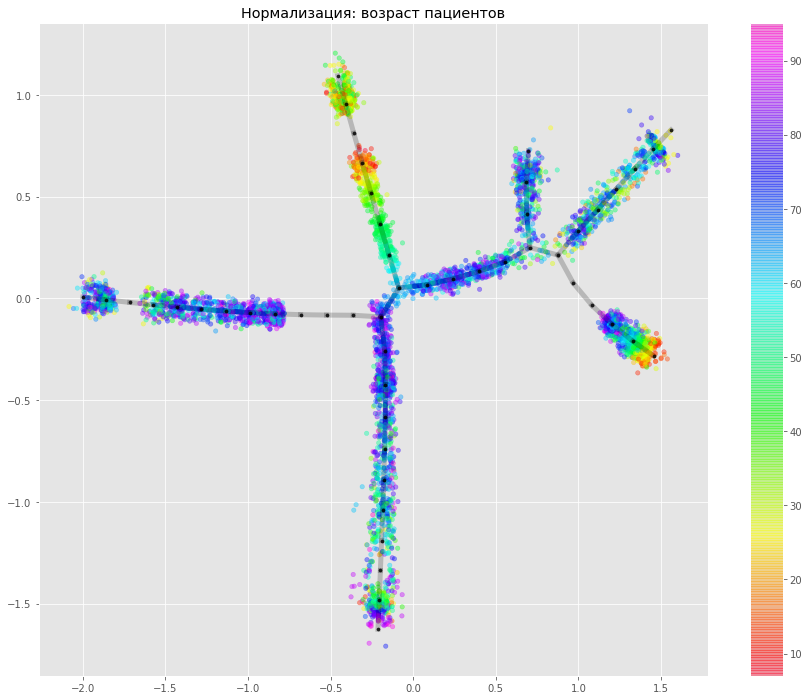

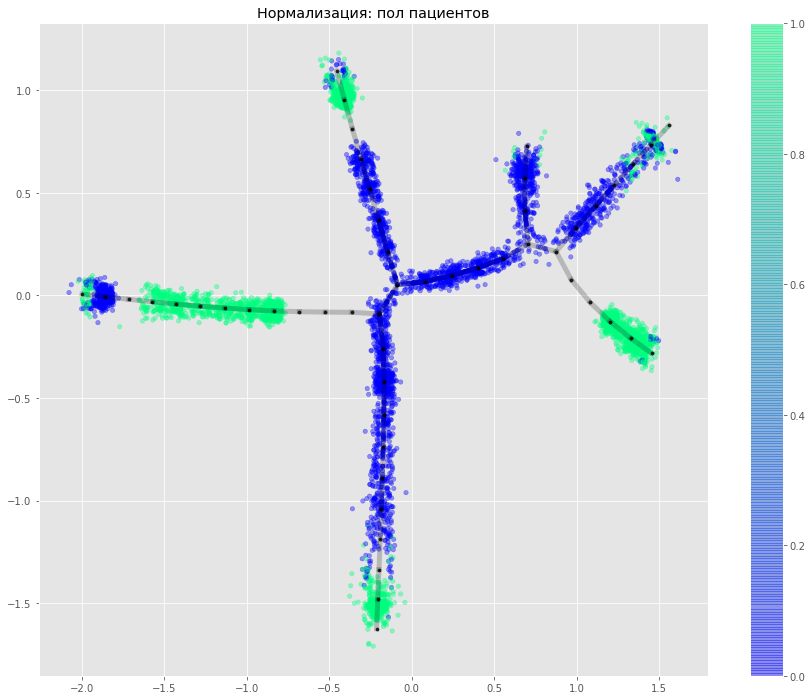

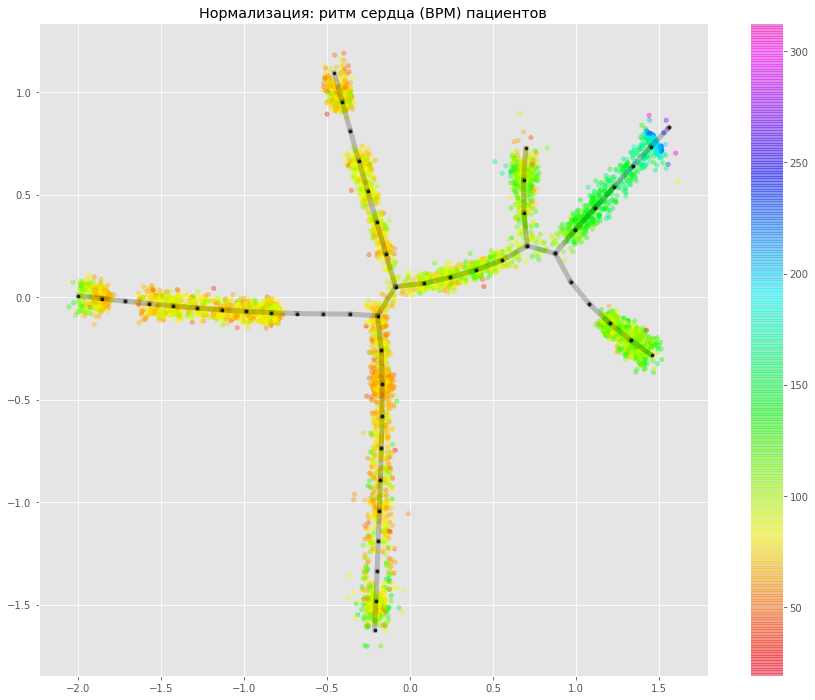

In [224]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='f_label', cmap='gist_rainbow', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Нормализация: классы аритмии пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='age', cmap='gist_rainbow', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Нормализация: возраст пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='sex', cmap='winter', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Нормализация: пол пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='Heart_rate', cmap='gist_rainbow', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Нормализация: ритм сердца (BPM) пациентов")
plt.show()

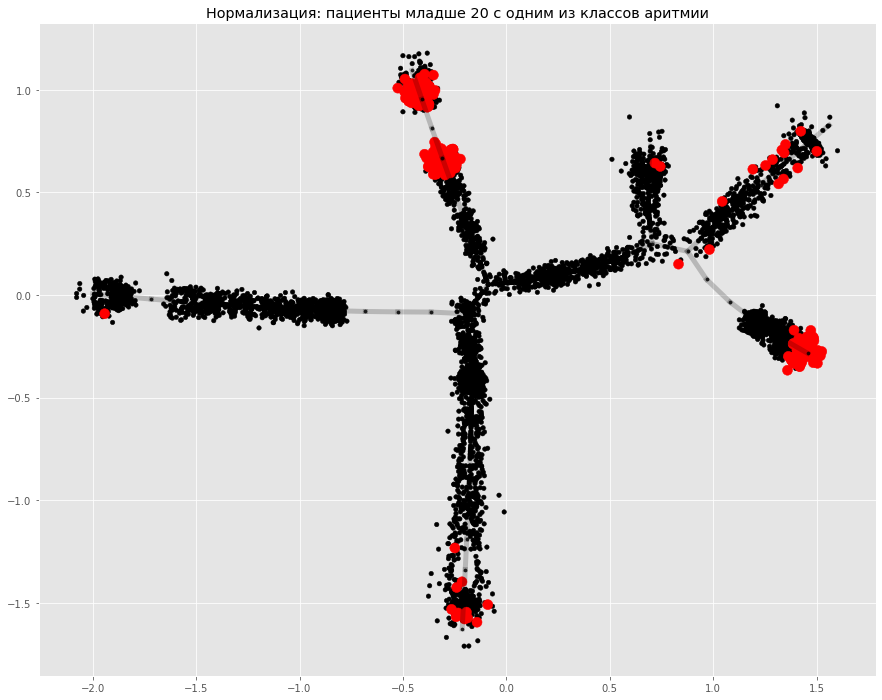

In [225]:
some_age = 20
fig = plt.figure(figsize=figsize)
inds = np.where((X_orig_imputer[:,variable_names.index('age')] <= some_age) & 
                (X_orig_imputer[:,variable_names.index('f_label')] >= 0))[0]
colors = ['k' for i in range(len(X_pca_norm))]
for i in inds:
    colors[i] = 'r'
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, colors, variable_names,
                          highlight_subset=inds, cmap='hot')
plt.title(f"Нормализация: пациенты младше {some_age} с одним из классов аритмии")
plt.show()

#### Стандартизация

#### Оптимизация

In [226]:
variable_names

['Qrst_dur',
 'P_Q_duration',
 'Q_T_duration',
 'T_duration',
 'P_duration',
 'Heart_rate',
 'sex',
 'age',
 'f_label']

In [227]:
X_orig_opt[0]

array([ 0.08325   ,  0.235375  ,  0.397375  ,  0.17025   ,  0.109     ,
       74.29420505,  0.        , 71.        ,  5.        ])

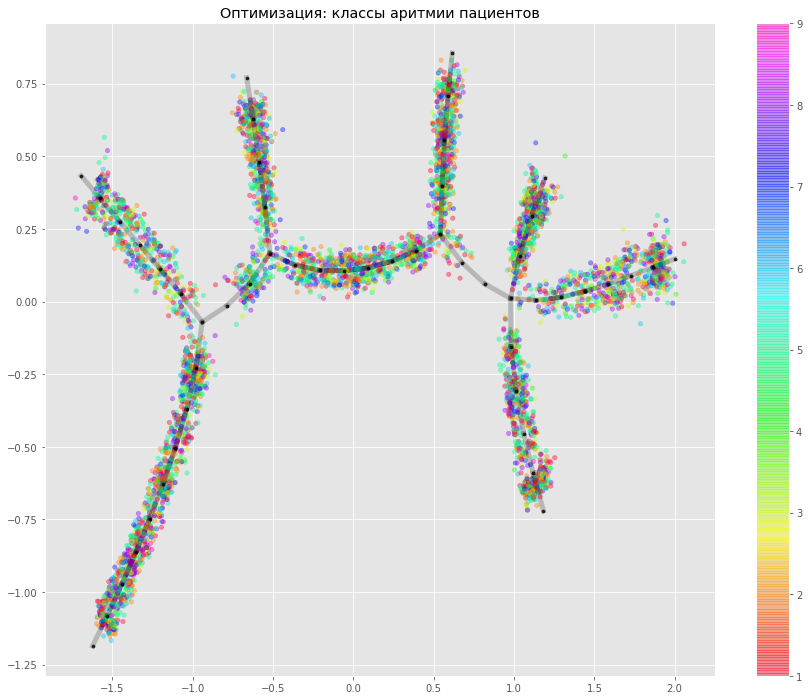

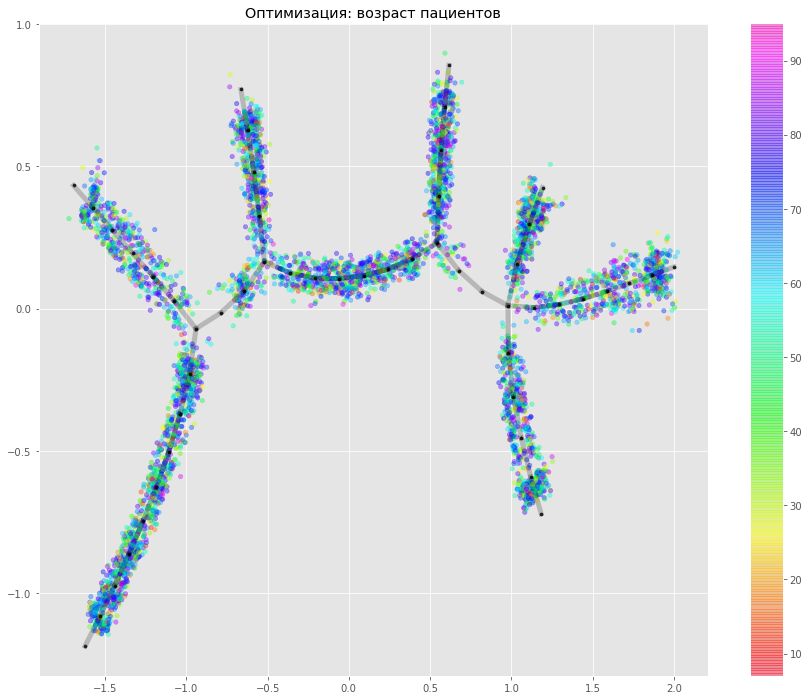

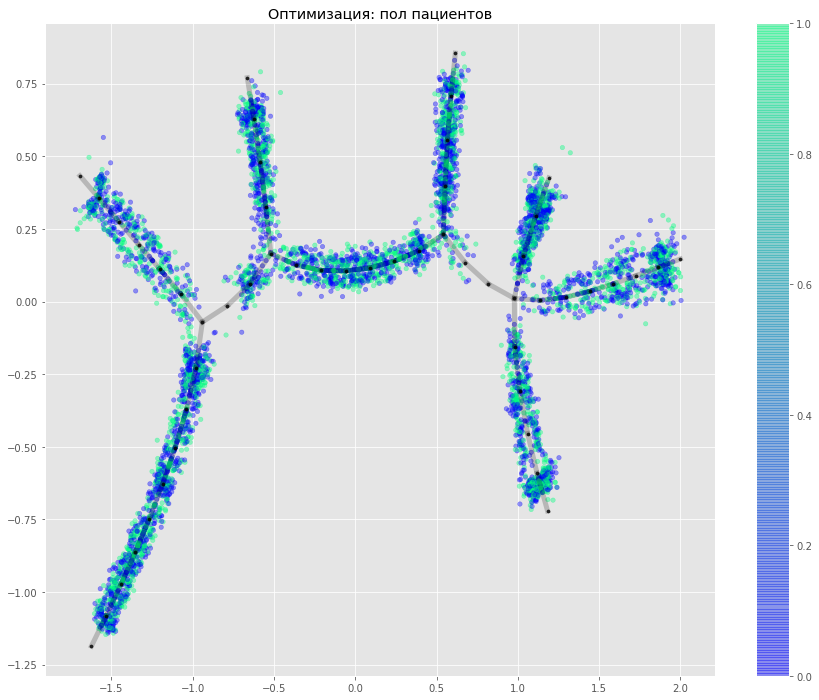

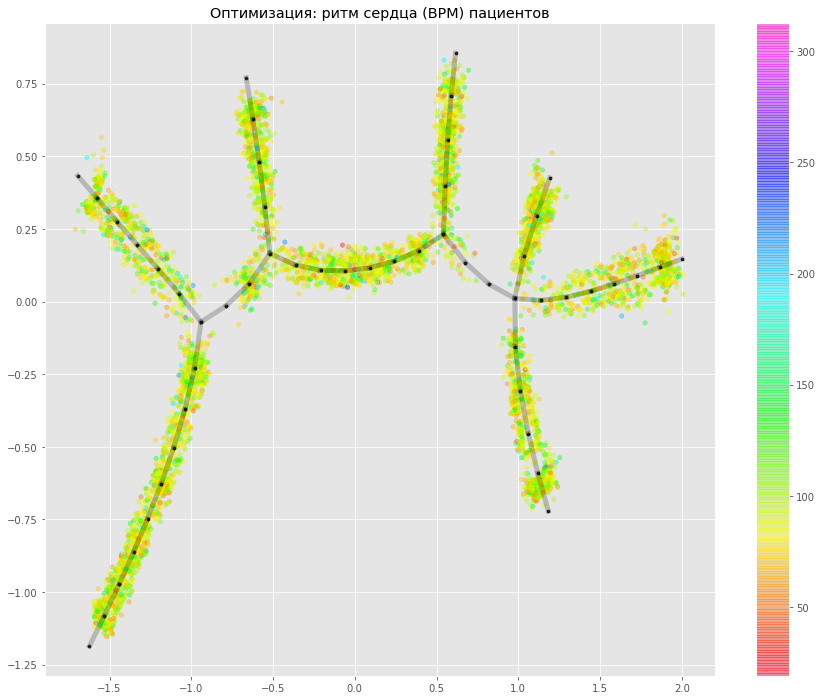

In [228]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='f_label', cmap='gist_rainbow', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Оптимизация: классы аритмии пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='age', cmap='gist_rainbow', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Оптимизация: возраст пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='sex', cmap='winter', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Оптимизация: пол пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='Heart_rate', cmap='gist_rainbow', add_color_bar=True, Transparency_Alpha_points = 0.4)
plt.title("Оптимизация: ритм сердца (BPM) пациентов")
plt.show()

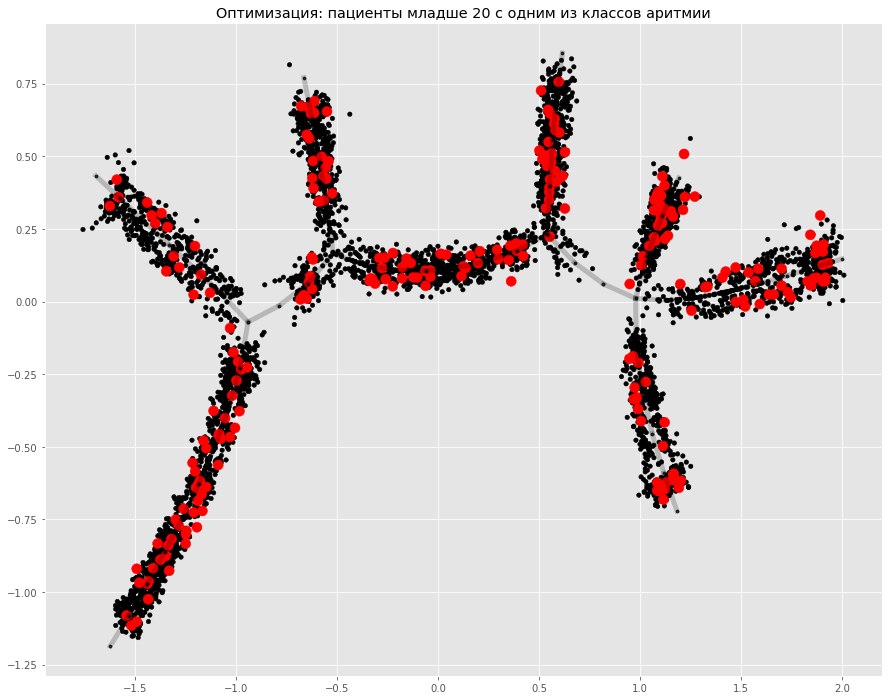

In [229]:
some_age = 20
fig = plt.figure(figsize=figsize)
inds = np.where((X_orig_opt[:,variable_names.index('age')] <= some_age) & 
                (X_orig_opt[:,variable_names.index('f_label')] >= 0))[0]
colors = ['k' for i in range(len(X_pca_opt))]
for i in inds:
    colors[i] = 'r'
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, colors, variable_names,
                          highlight_subset=inds, cmap='hot')
plt.title(f"Оптимизация: пациенты младше {some_age} с одним из классов аритмии")
plt.show()